<a href="https://colab.research.google.com/github/cuongcodeF4/Artificial-Intelligence/blob/main/nutritional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=af6b2fe2f96c9cdf57237f5943f30d4abe193e8a258bef923eb647dad745c082
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


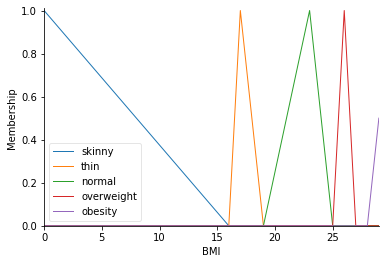

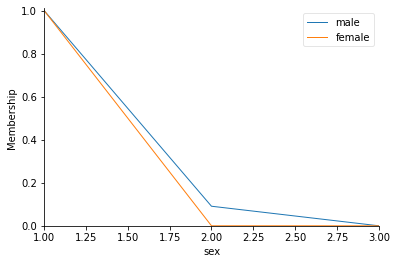

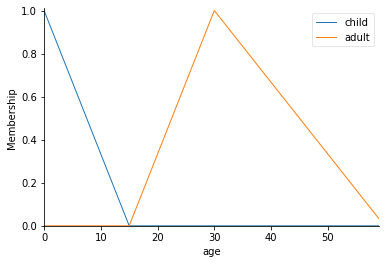

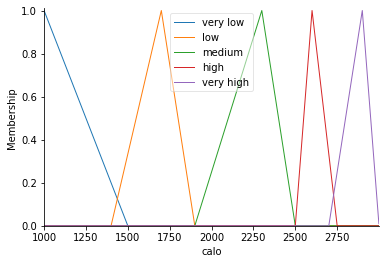

In [6]:

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

sex = ctrl.Antecedent(np.arange(1,4,1), 'sex')
age = ctrl.Antecedent(np.arange(0,60,1), 'age')
calo = ctrl.Antecedent(np.arange(1000,3000,1), 'calo')
BMI = ctrl.Consequent(np.arange(0,30,1), 'BMI')


BMI['skinny'] = fuzz.trimf(BMI.universe, [0,0,16])
BMI['thin'] = fuzz.trimf(BMI.universe, [16,17,19])
BMI['normal'] = fuzz.trimf(BMI.universe, [19,23,25])
BMI['overweight'] = fuzz.trimf(BMI.universe, [26,26,27])
BMI['obesity'] = fuzz.trimf(BMI.universe, [28,30,30])
BMI.view()
sex['male'] = fuzz.trimf(sex.universe, [0,1,2.1])
sex['female'] = fuzz.trimf(sex.universe, [0,1,2])
sex.view()
age['child'] = fuzz.trimf(age.universe, [0,0,15])
age['adult'] = fuzz.trimf(age.universe, [15,30,60])
age.view()
calo['very low'] = fuzz.trimf(calo.universe, [1000,1000,1500])
calo['low'] = fuzz.trimf(calo.universe, [1400,1700,1900])
calo['medium'] = fuzz.trimf(calo.universe, [1900,2300,2500])
calo['high'] = fuzz.trimf(calo.universe, [2500,2600,2750])
calo['very high'] = fuzz.trimf(calo.universe, [2700,2900,3000])
calo.view()

rule1 = ctrl.Rule(sex['male']& age['child']& calo['very low'], BMI['skinny'])
rule2 = ctrl.Rule(sex['male']& age['child']& calo['low'], BMI['thin'])
rule3 = ctrl.Rule(sex['male']& age['child']& calo['medium'], BMI['normal'])
rule4 = ctrl.Rule(sex['male']& age['child']& calo['high'], BMI['overweight'])
rule5 = ctrl.Rule(sex['male']& age['child']& calo['very high'], BMI['obesity'])
rule6 = ctrl.Rule(sex['male']& age['adult']& calo['very low'], BMI['thin'])
rule7 = ctrl.Rule(sex['male']& age['adult']& calo['low'], BMI['thin'])
rule8 = ctrl.Rule(sex['male']& age['adult']& calo['medium'], BMI['normal'])
rule9 = ctrl.Rule(sex['male']& age['adult']& calo['high'], BMI['overweight'])
rule10 = ctrl.Rule(sex['male']& age['adult']& calo['very high'], BMI['obesity'])
rule11 = ctrl.Rule(sex['female']& age['child']& calo['very low'], BMI['skinny'])
rule12 = ctrl.Rule(sex['female']& age['child']& calo['low'], BMI['skinny'])
rule13 = ctrl.Rule(sex['female']& age['child']& calo['medium'], BMI['thin'])
rule14 = ctrl.Rule(sex['female']& age['child']& calo['high'], BMI['normal'])
rule15 = ctrl.Rule(sex['female']& age['child']& calo['very high'], BMI['overweight'])
rule16 = ctrl.Rule(sex['female']& age['adult']& calo['very low'], BMI['thin'])
rule17 = ctrl.Rule(sex['female']& age['adult']& calo['low'], BMI['thin'])
rule18 = ctrl.Rule(sex['female']& age['adult']& calo['medium'], BMI['normal'])
rule19 = ctrl.Rule(sex['female']& age['adult']& calo['high'], BMI['overweight'])
rule20 = ctrl.Rule(sex['female']& age['adult']& calo['very high'], BMI['obesity'])


BMI_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
BMIing= ctrl.ControlSystemSimulation(BMI_ctrl)
BMIing.input['sex']=1
BMIing.input['age']=40
BMIing.input['calo']=2000